This notebook will help you get started solving the given problem. In this challenge, we have to predict the attack type. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', 1000)
import gc

In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [3]:
print('The train data has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('The test data has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

The train data has 169307 rows and 43 columns
The test data has 91166 rows and 42 columns


In [4]:
## check target class
train['target'].value_counts(normalize=True)

0    0.583957
2    0.217676
1    0.198367
Name: target, dtype: float64

In [5]:
target = train['target']

In [6]:
def get_features(tmp):
    return [x for x in tmp.columns if x not in ['connection_id','target']]

In [7]:
def free():
    return gc.collect()

In [8]:
def plot_(tmp,an=True):
    plt.figure(figsize=(15,10))
    sns.heatmap(data=tmp.corr(),annot=an)
    plt.show()

In [9]:
#print(train.corr()['target'])

There aren't any missing values. Let's jump to building models to get some baseline score.

In [10]:
## check missing values
#train.isnull().sum(axis=0) ## there are no missing values.

In [11]:
pca=PCA(n_components=2,svd_solver='full',random_state=1996)

In [12]:
pca.fit(train[get_features(train)])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=1996,
  svd_solver='full', tol=0.0, whiten=False)

In [13]:
print(sum(pca.explained_variance_ratio_))

0.999820606401


In [14]:
pca_tr_early=pca.transform(train[get_features(train)])

In [15]:
pca_ts_early=pca.transform(test[get_features(test)])

In [16]:
pca_tr_early=pd.DataFrame(pca_tr_early,columns=['pca'+str(i) for i in range(2)])
pca_ts_early=pd.DataFrame(pca_ts_early,columns=['pca'+str(i) for i in range(2)])

In [17]:
print(pca_tr_early.shape,pca_ts_early.shape)

(169307, 2) (91166, 2)


In [18]:
free()

21

In [19]:
print(pca_tr_early.head(),pca_ts_early.head())

         pca0        pca1
0  -82.257726 -747.057980
1 -593.625489 -721.622468
2  -82.257726 -747.057980
3  -82.257726 -747.057980
4  -82.257726 -747.057980          pca0         pca1
0 -480.055638  5365.433597
1 -593.625489  -721.622468
2  -82.257726  -747.057980
3  -82.257613  -747.057448
4  -82.257726  -747.057980


# Preprocessing after Visualization

In [22]:
for i in ['cat_4','cat_5','cat_6','cat_7','cat_8','cat_11','cat_12','cat_15','cat_17','cat_18']:
    print(i,'  ',len(train[i][train[i]!=0]))

cat_4    2
cat_5    42
cat_6    1
cat_7    335
cat_8    18
cat_11    17
cat_12    4
cat_15    12
cat_17    0
cat_18    1


In [23]:
#Drop 'cat_4','cat_5','cat_6','cat_7','cat_8','cat_11','cat_12','cat_15','cat_17','cat_18' columns
train=train.drop(['cat_4','cat_5','cat_6','cat_8','cat_11','cat_12','cat_15','cat_17','cat_18'],1)
test=test.drop(['cat_4','cat_5','cat_6','cat_8','cat_11','cat_12','cat_15','cat_17','cat_18'],1)

CAT_10 And CAT_13 Analysis

          cat_10    cat_13
cat_10  1.000000  0.993754
cat_13  0.993754  1.000000
          cat_10    cat_13
cat_10  1.000000  0.998468
cat_13  0.998468  1.000000
0    0
1    0
2    0
3    0
4    0
Name: cat_13, dtype: int64 0    0
1    0
2    0
3    0
4    0
Name: cat_10, dtype: int64
435 0 0 480
884 0 0 993


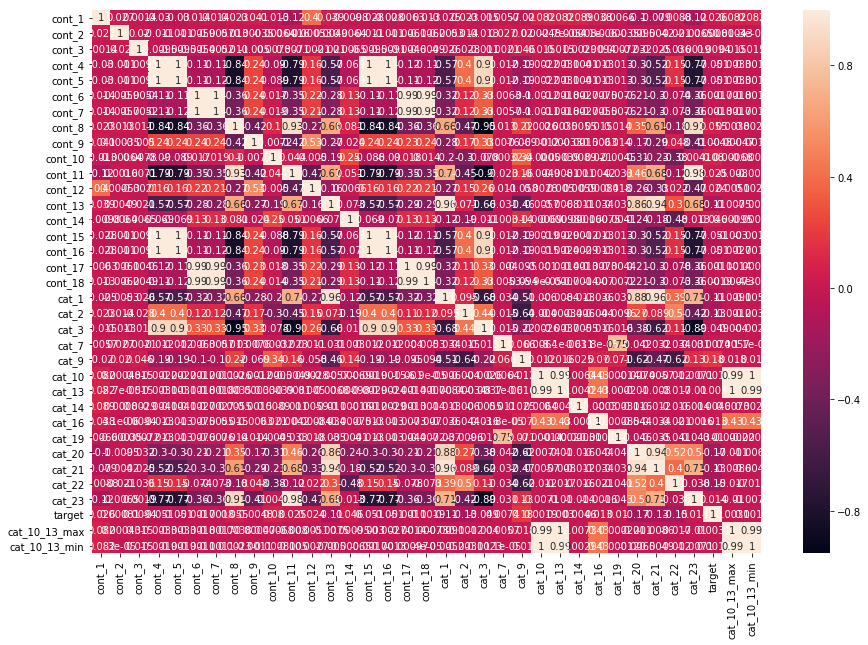

               cat_10_13_max  cat_10_13_min    target
cat_10_13_max       1.000000       0.993927  0.003078
cat_10_13_min       0.993927       1.000000  0.001874
target              0.003078       0.001874  1.000000


In [24]:
print(train[['cat_10','cat_13']].corr())
print(test[['cat_10','cat_13']].corr())

#below transformation gives perfect correlation map as it is not correlated with others
print(train['cat_13'].head(),train['cat_10'].head())
print(max(train['cat_10']),min(train['cat_13']),min(train['cat_10']),max(train['cat_13']))
print(max(test['cat_10']),min(test['cat_13']),min(test['cat_10']),max(test['cat_13']))

train['cat_10_13_max']=[max(i,j) for i,j in zip(train['cat_10'],train['cat_13'])]
test['cat_10_13_max']=[max(i,j) for i,j in zip(test['cat_10'],test['cat_13'])]
train['cat_10_13_min']=[min(i,j) for i,j in zip(train['cat_10'],train['cat_13'])]
test['cat_10_13_min']=[min(i,j) for i,j in zip(test['cat_10'],test['cat_13'])]

plt.figure(figsize=(15,10))
sns.heatmap(data=train.corr(),annot=True)
plt.show()

print(train[['cat_10_13_max','cat_10_13_min','target']].corr())


#choose cat_10_13_max 

train=train.drop(['cat_10_13_min','cat_10','cat_13'],1)
test=test.drop(['cat_10_13_min','cat_10','cat_13'],1)

In [25]:
#cat_4,cat_5,cat_6,cat_7,cat_15,cat_16

Analyze cont_17, cont_18  , we have found that its transformation to mean of both only correlates with cont_6 and cont_7
So, we will go with accepting this instead cont_6,cont_7 problem

In [26]:
free()

137628

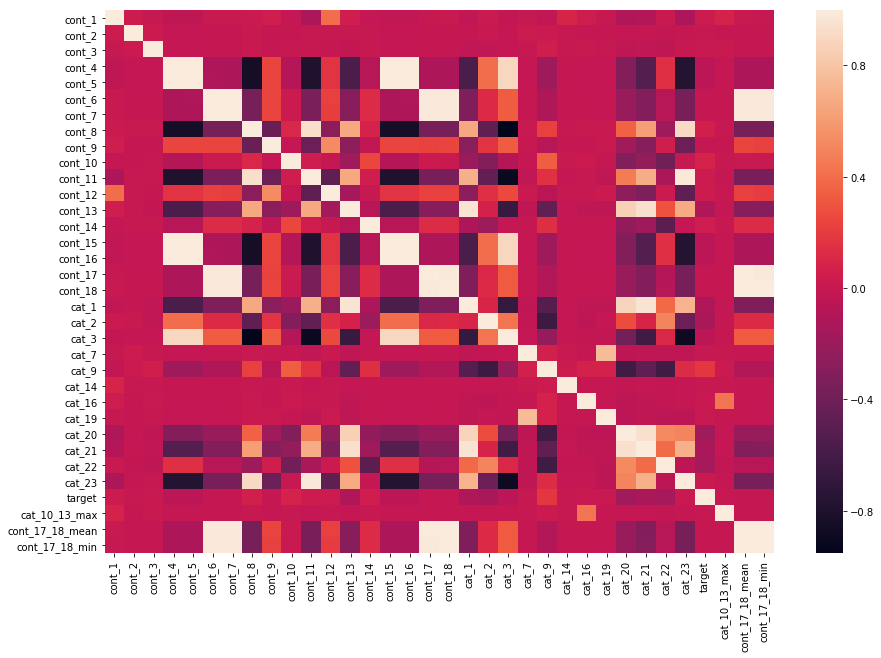

                 cont_17_18_min  cont_17_18_mean    target
cont_17_18_min         1.000000         0.996754 -0.003298
cont_17_18_mean        0.996754         1.000000 -0.001513
target                -0.003298        -0.001513  1.000000


In [27]:
train['cont_17_18_mean']=[(i+j)/2 for i,j in zip(train['cont_17'],train['cont_18'])]
test['cont_17_18_mean']=[(i+j)/2 for i,j in zip(test['cont_17'],test['cont_18'])]

train['cont_17_18_min']=[min(i,j) for i,j in zip(train['cont_17'],train['cont_18'])]
test['cont_17_18_min']=[min(i,j) for i,j in zip(test['cont_17'],test['cont_18'])]

plt.figure(figsize=(15,10))
sns.heatmap(data=train.corr(),annot=False)
plt.show()

print(train[['cont_17_18_min','cont_17_18_mean','target']].corr())

#Try Keeping both min and min coulmn still both are correalted

train=train.drop(['cont_17','cont_18'],1)
test=test.drop(['cont_17','cont_18'],1)

#Analyzing cont_6 and cont_7 

In [28]:
train['cont_4_5_max']=[max(i,j) for i,j in zip(train['cont_4'],train['cont_5'])]
train['cont_6_7_min']=[min(i,j) for i,j in zip(train['cont_6'],train['cont_7'])]
train['cont_15_16_min']=[min(i,j) for i,j in zip(train['cont_15'],train['cont_16'])]
train['cont_15_16_min']=train['cont_14']*2 + np.exp(train['cont_15_16_min'])

test['cont_4_5_max']=[max(i,j) for i,j in zip(test['cont_4'],test['cont_5'])]
test['cont_6_7_min']=[min(i,j) for i,j in zip(test['cont_6'],test['cont_7'])]
test['cont_15_16_min']=[min(i,j) for i,j in zip(test['cont_15'],test['cont_16'])]
test['cont_15_16_min']=test['cont_14']*2 + np.exp(test['cont_15_16_min'])

In [26]:
#choose min due to high corr
train=train.drop(['cont_15','cont_16','cont_4','cont_5','cont_6','cont_7'],1)
test=test.drop(['cont_15','cont_16','cont_4','cont_5','cont_6','cont_7'],1)

In [29]:
print(train.shape,test.shape)

(169307, 36) (91166, 35)


PCA

In [28]:
pca_2_tr=pca.fit_transform(train[get_features(train)])
pca_2_ts=pca.transform(test[get_features(test)])

In [29]:
pca_2_tr=pd.DataFrame(pca_2_tr,columns=['pca_2_1','pca_2_2'])
pca_2_ts=pd.DataFrame(pca_2_ts,columns=['pca_2_1','pca_2_2'])

In [30]:
print(pca_2_tr.head(),pca_2_ts.shape)

      pca_2_1     pca_2_2
0  -82.257727 -747.057980
1 -593.625489 -721.622468
2  -82.257726 -747.057980
3  -82.257726 -747.057980
4  -82.257726 -747.057980 (91166, 2)


In [31]:
free()

14372

In [32]:
print(pca_tr_early.head(),pca_ts_early.head())

         pca0        pca1
0  -82.257726 -747.057980
1 -593.625489 -721.622468
2  -82.257726 -747.057980
3  -82.257726 -747.057980
4  -82.257726 -747.057980          pca0         pca1
0 -480.055638  5365.433597
1 -593.625489  -721.622468
2  -82.257726  -747.057980
3  -82.257613  -747.057448
4  -82.257726  -747.057980


In [33]:
#plot_(pd.DataFrame(pd.concat([pca_tr_early,pca_2_tr],1)),False)
print(pd.DataFrame(pd.concat([pca_tr_early,pca_2_tr],1)).corr())

                 pca0          pca1       pca_2_1       pca_2_2
pca0     1.000000e+00  8.885425e-15  1.000000e+00  5.122785e-14
pca1     8.885425e-15  1.000000e+00 -3.805405e-14  1.000000e+00
pca_2_1  1.000000e+00 -3.805405e-14  1.000000e+00  4.216871e-15
pca_2_2  5.122785e-14  1.000000e+00  4.216871e-15  1.000000e+00


In [34]:
print(pca_tr_early.head(),pca_2_tr.head())

         pca0        pca1
0  -82.257726 -747.057980
1 -593.625489 -721.622468
2  -82.257726 -747.057980
3  -82.257726 -747.057980
4  -82.257726 -747.057980       pca_2_1     pca_2_2
0  -82.257727 -747.057980
1 -593.625489 -721.622468
2  -82.257726 -747.057980
3  -82.257726 -747.057980
4  -82.257726 -747.057980


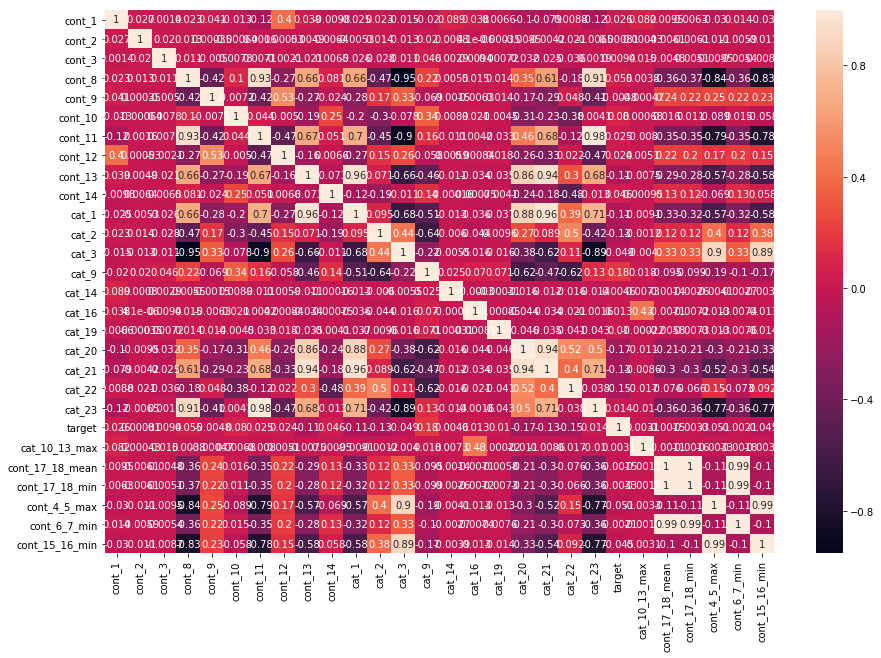

In [35]:
plot_(train)

In [36]:
# train=train.drop(['cont_17_18_min'],1)
# test=test.drop(['cont_17_18_min'],1)

In [37]:
# train=pd.concat([train,pca_tr_early],1)
# test=pd.concat([test,pca_ts_early],1)

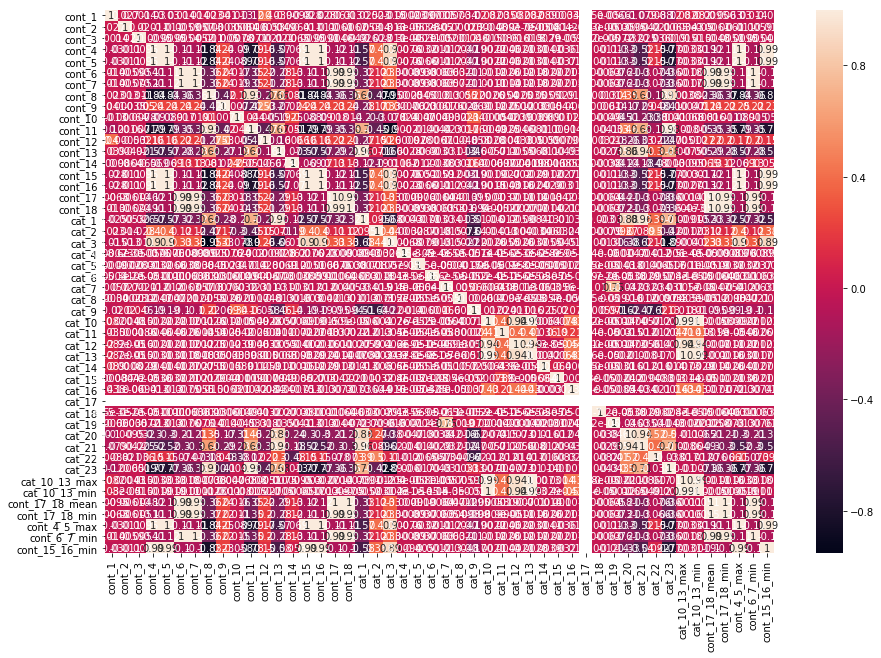

In [201]:
plot_(train[get_features(train)])

In [202]:
print(train.columns,train.shape,test.shape,test.columns)

Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5',
       'cont_6', 'cont_7', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12',
       'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18',
       'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8',
       'cat_9', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14', 'cat_15',
       'cat_16', 'cat_17', 'cat_18', 'cat_19', 'cat_20', 'cat_21', 'cat_22',
       'cat_23', 'target', 'cat_10_13_max', 'cat_10_13_min', 'cont_17_18_mean',
       'cont_17_18_min', 'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min'],
      dtype='object') (169307, 50) (91166, 49) Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5',
       'cont_6', 'cont_7', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12',
       'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18',
       'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8',
       'cat_9', 'cat_10', 'cat_1

In [38]:
pca_last_tr=pca.fit_transform(pd.concat([train[get_features(train)],pca_2_tr,pca_tr_early],1))

In [39]:
pca_last_ts=pca.transform(pd.concat([test[get_features(test)],pca_2_ts,pca_ts_early],1))

In [40]:
pca_last_tr=pd.DataFrame(pca_last_tr,columns=['pca_'+str(i) for i in range(2)])
pca_last_ts=pd.DataFrame(pca_last_ts,columns=['pca_'+str(i) for i in range(2)])

In [41]:
print(pca_last_tr.head(),pca_last_ts.head())

         pca_0        pca_1
0  -142.474562 -1293.942378
1 -1028.189500 -1249.886779
2  -142.474562 -1293.942377
3  -142.474562 -1293.942378
4  -142.474562 -1293.942378          pca_0        pca_1
0  -831.480755  9293.203594
1 -1028.189508 -1249.886779
2  -142.474562 -1293.942378
3  -142.474366 -1293.941457
4  -142.474562 -1293.942378


In [42]:
train=pd.concat([train,pca_last_tr],1)
test=pd.concat([test,pca_last_ts],1)

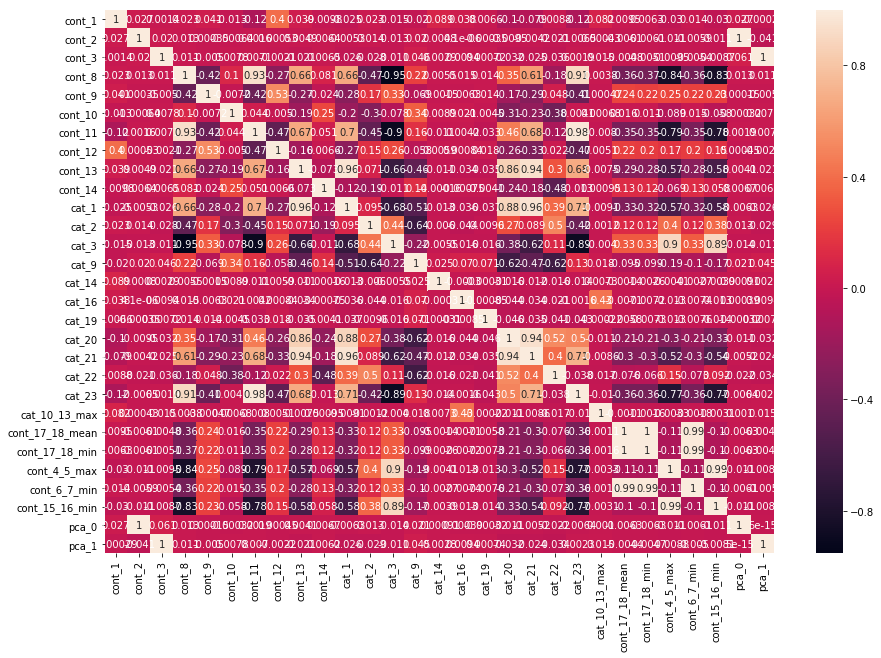

In [43]:
plot_(train[get_features(train)])

In [44]:
print(train.shape,test.shape,train.columns,test.columns)

(169307, 31) (91166, 30) Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9',
       'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2',
       'cat_3', 'cat_9', 'cat_14', 'cat_16', 'cat_19', 'cat_20', 'cat_21',
       'cat_22', 'cat_23', 'target', 'cat_10_13_max', 'cont_17_18_mean',
       'cont_17_18_min', 'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min',
       'pca_0', 'pca_1'],
      dtype='object') Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9',
       'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2',
       'cat_3', 'cat_9', 'cat_14', 'cat_16', 'cat_19', 'cat_20', 'cat_21',
       'cat_22', 'cat_23', 'cat_10_13_max', 'cont_17_18_mean',
       'cont_17_18_min', 'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min',
       'pca_0', 'pca_1'],
      dtype='object')


In [45]:
free()

97634

In [46]:
# train=train.drop(['cat_17'],1)
# test=test.drop(['cat_17'],1)

# MODEL XGB

In [47]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [48]:
X_train, X_valid, y_train, y_valid = train_test_split(train, target, train_size = 0.8, stratify = target, random_state = 1996)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [49]:
## function for multi-accuracy
from sklearn.metrics import accuracy_score
def multAcc(pred, dtrain):
    label = dtrain.get_label()
    acc = accuracy_score(label, pred)
    return 'maccuracy', acc

In [52]:
# default parameters
params_ = {}
params_['objective'] = 'multi:softmax'
params_['eta'] = 0.2
params_['silent'] = True
params_['max_depth'] = 10
params_['subsample'] = 0.9
params_['colsample_bytree'] = 0.9
params_['nthread']=-1
params_['num_class']=3
params_['booster']='gbtree'
params_['lambda']=.8
params_['min_child_weight']=20
'''
{'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10,
            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}
'''

"\n{'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10,\n            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,\n            'eval_metric': 'rmse', 'objective': 'reg:linear'}\n"

In [53]:
# default parameters
params = {}
params['objective'] = 'multi:softmax'
params['eta'] = 0.02
params['silent'] = True
params['max_depth'] = 6
params['subsample'] = 0.9
params['colsample_bytree'] = 0.9
params['nthread']=-1
params['num_class']=3

In [54]:
#dtrain = xgb.DMatrix(data=train[get_features(train)], label=target)
dtrain = xgb.DMatrix(data=X_train[get_features(train)], label=y_train)
dvalid = xgb.DMatrix(data=X_valid[get_features(train)], label=y_valid)
dtest = xgb.DMatrix(data=test[get_features(test)])
watchlist = [(dtrain, 'train'),(dvalid, 'eval')]

In [55]:
free()

202

In [341]:
clf1_1 = xgb.train(params, dtrain, 380)

In [56]:
clf1_2 = xgb.train(params, dtrain, 20000, watchlist, maximize=True, verbose_eval=50, early_stopping_rounds=140, feval=multAcc)

[0]	train-maccuracy:0.778006	eval-maccuracy:0.777834
Multiple eval metrics have been passed: 'eval-maccuracy' will be used for early stopping.

Will train until eval-maccuracy hasn't improved in 140 rounds.
[50]	train-maccuracy:0.780206	eval-maccuracy:0.780137
[100]	train-maccuracy:0.781018	eval-maccuracy:0.780698
[150]	train-maccuracy:0.781247	eval-maccuracy:0.780816
[200]	train-maccuracy:0.78152	eval-maccuracy:0.780964
[250]	train-maccuracy:0.781631	eval-maccuracy:0.781023
[300]	train-maccuracy:0.781705	eval-maccuracy:0.781053
[350]	train-maccuracy:0.78183	eval-maccuracy:0.780993
[400]	train-maccuracy:0.781926	eval-maccuracy:0.780993
Stopping. Best iteration:
[277]	train-maccuracy:0.781683	eval-maccuracy:0.781053



In [342]:
sub=pd.read_csv('test_data.csv')

In [343]:
pred = clf1_1.predict(dtest)

In [344]:
## make submission
sub['target'] = pred
sub['target'] = sub['target'].astype(int)
sub[['connection_id','target']].to_csv('XGB_06_NOV_78.1023_.01.csv', index=False)

In [345]:
import pickle
pickle.dump(clf1_1,open('781023.sav','wb'))

In [346]:
free()

49

### Model 2 - Decision Tree

In [153]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [154]:
## set up model
clf2 = DecisionTreeClassifier(max_depth=9, min_samples_split=7)

In [155]:
clf2.fit(X_train[feature_names],y_train)

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x0000026A8356E390>>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [156]:
print(accuracy_score(y_valid,clf2.predict(X_valid[feature_names])))

0.780077963499


In [42]:
## train model
clf2.fit(train[feature_names], target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=7, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [44]:
## make prediction
pred2 = clf2.predict(test[feature_names])

In [47]:
## make submission
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred2
sub['target'] = sub['target'].astype(int)
sub.to_csv('sub2.csv', index=False)

### Model 3 - Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [50]:
clf3 = LogisticRegression(C=0.01,n_jobs=-1,solver='sag')

In [48]:
clf3.fit(X_train[feature_names],y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
clf3.fit(train[feature_names], target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
print(accuracy_score(y_valid,clf3.predict(X_valid[feature_names])))

0.731705156222


In [49]:
print(accuracy_score(y_valid,clf3.predict(X_valid[feature_names])))

0.731705156222


In [52]:
pred3 = clf3.predict(test[feature_names])

In [53]:
## make submission
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred3
sub['target'] = sub['target'].astype(int)
sub.to_csv('sub3_Logistic.csv', index=False)

# MODEL 4 - NaiveBayes Classifier

In [96]:
from sklearn.naive_bayes import GaussianNB

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
x_tr=StandardScaler().fit_transform(X_train[feature_names])
x_ts=StandardScaler().fit_transform(X_valid[feature_names])

In [119]:
clf4=GaussianNB()

In [120]:
clf4.fit(X_train[feature_names],y_train)

GaussianNB(priors=None)

In [121]:
print(accuracy_score(y_valid,clf4.predict(X_valid[feature_names])))

0.753292776564


In [122]:
clf4.fit(train[feature_names], target)

GaussianNB(priors=None)

In [124]:
pred3 = clf4.predict(test[feature_names])

In [125]:
## make submission
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred3
sub['target'] = sub['target'].astype(int)
sub.to_csv('sub5_NaiveBayes.csv', index=False)

# Model 5 : -    RandomForest

In [340]:
from sklearn.ensemble import RandomForestClassifier

In [483]:
clf=RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=2,
                           min_samples_leaf=50, min_weight_fraction_leaf=0.0, max_features=None, 
                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                           bootstrap=True, oob_score=True, n_jobs=-1, random_state=1996, verbose=0,
                           warm_start=False, class_weight=None)

In [484]:
clf.fit(X_train[feature_names],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=1996, verbose=0, warm_start=False)

In [485]:
print(accuracy_score(y_valid,clf.predict(X_valid[feature_names])))

0.780402811411


In [347]:
clf.fit(train[feature_names], target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=-1,
            oob_score=True, random_state=1996, verbose=0, warm_start=False)

In [348]:
pred3 = clf.predict(test[feature_names])

In [349]:
## make submission
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred3
sub['target'] = sub['target'].astype(int)
sub.to_csv('sub4_Random_f_2.csv', index=False)